<a href="https://colab.research.google.com/github/lompas10/ML_course_MIREA/blob/main/2/lab_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

In [158]:
# Теперь вы сотрудник лаборатории, производящей процессоры.
# У вас есть данные о прохождении процессором 2-ух тестов, которые определяют его исправность.
# Кроме того, данные размечены. То есть исправные процессоры помечены меткой 1, остальные 0.

# Ваша задача - заполнить код в функциях:
# logistic - вычисляет логистическую функцию от аргумента,
# compute_cost_reg - вычисляет функцию стоимости c регуляризацией,
# compute_cost_grad_reg - вычисляет градиент функции стоимости с регуляризацией.

# В данной задаче будет использоваться градиентный метод оптимизации, определенный в библиотеке scipy, так что
# не нужно реализовывать градиентный спуск.

# По ходу работы смотрите в консоль. Там будут выводиться результаты написанных вами функций и ожидаемые результаты.
# Так вы сможете проверить себя.

# Комментарии к графикам:
# Первый график - исходные данные
# Второй - исходные данные с результатом работы модели - границей решений.
# Черным цветом обозначено поле, попадание точки в которое означает ее
# принадлежность к 1 классу (процессор исправен), белым - принадлежность к 0 классу (не исправен).

In [159]:
def map_features(X):

    # Эта функция добавляет все комбинации признаков 2, 3, ..., 6 степеней в матрицу данных.
    # Это нужно для того, чтобы мы могли построить нелинейную границу решений.
    # При таком большом количестве признаков может возникнуть проблема переобучения
    # С ней мы и поборемся с помощью регуляризации.

    result = list()
    for k in range(X.shape[0] if len(X.shape) == 2 else 1):
        vec = list(X[k, :] if len(X.shape) == 2 else X)
        for i in range(2, 7):
            for j in range(i + 1):
                vec.append(vec[1] ** j * vec[2] ** (i - j))
        result.append(vec)
    return np.array(result)

In [160]:
def logistic(z):

    # Функция принимает аргумент z - скаляр, вектор или матрицу в виде объекта numpy.array()
    # Должна возвращать скяляр, вектор или матрицу (в зависимости от размерности z)
    # результатов вычисления логистической функции от элементов z

    return 1 / (1 + np.exp(-z))


In [161]:
def compute_cost_reg(X, y, theta, lamb):

    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Кроме того, функция принимает параметр регуляризации lamb.
    # Должна возвратить число - результат вычисления функции стоимости в точке theta.

    m, n = X.shape

    return (-1 / m) * sum(y * np.log(logistic(X @ theta)) + (1 - y) * np.log(1 - logistic(X @ theta))) + lamb / m * sum(theta ** 2)

In [162]:
def compute_cost_grad_reg(X, y, theta, lamb):
    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Кроме того, функция принимает параметр регуляризации lamb.
    # Должна возвратить вектор координат градиента функции стоимости в точке theta.
    # Вектор можно заполнять в виде списка python. При возврате он преобразуется в массив numpy.

    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    grad = (1 / m) * ((logistic(X @ theta) - y).T @ X) + 2 * lamb / m * theta # вектор градиента функции стоимости по theta, его нужно заполнить

    return np.array(grad)

In [163]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

In [164]:
X, y = load_data('lab2data2.txt')

X = map_features(X)

In [165]:
print(f'logistic(0) = {logistic(np.array(0))} (должно быть 0.5)\n'
      f'logistic(-10) = {logistic(np.array(-10))} (должно быть ~0)\n'
      f'logistic(10) = {logistic(np.array(10))} (должно быть ~1)')

logistic(0) = 0.5 (должно быть 0.5)
logistic(-10) = 4.5397868702434395e-05 (должно быть ~0)
logistic(10) = 0.9999546021312976 (должно быть ~1)


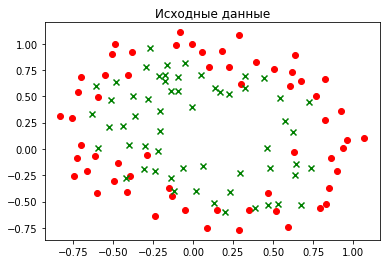

In [166]:
plt.title('Исходные данные')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()

In [167]:
lamb = 0.46
init_theta = np.zeros((X.shape[1], 1))
cost0 = compute_cost_reg(X, y, init_theta, lamb)
print(f'Функция стоимости при начальном theta = {cost0} (должно быть ~0.693)')

Функция стоимости при начальном theta = [0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718

In [168]:
opt_theta_obj = minimize(lambda th: compute_cost_reg(X, y, th, lamb), init_theta,
                         method='CG',
                         jac=lambda th: compute_cost_grad_reg(X, y, th, lamb),
                         options={'gtol': 1e-5, 'maxiter': 2000, 'disp': False})

print('Минимизация функции стоимости ' + ('прошла успешно.' if opt_theta_obj.success else 'не удалась.'))

Минимизация функции стоимости прошла успешно.


In [169]:
opt_theta = opt_theta_obj.x

opt_cost = compute_cost_reg(X, y, opt_theta, lamb)
print(f'Функция стоимости при оптимальном theta = {opt_cost} (должно быть ~0.529)')

Функция стоимости при оптимальном theta = 0.5295801943388816 (должно быть ~0.529)


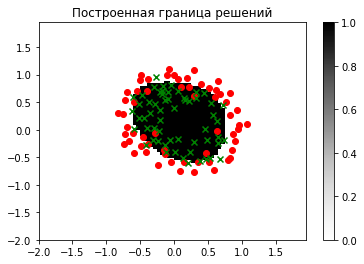

In [170]:
hm = np.zeros((80, 80))
for i in range(80):
    for j in range(80):
        hm[i, j] = round(logistic(opt_theta @ map_features(np.array([1, j / 20 - 2, i / 20 - 2])).transpose())[0])
c = plt.pcolor(np.arange(-2, 2, 0.05), np.arange(-2, 2, 0.05), hm, cmap='Greys')
plt.colorbar(c)

plt.title('Построенная граница решений')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()